In [ ]:
# uncomment if running in google collab for that free GPU ;)
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Code adapted from the new fastai book.  By Jeremy Howard who runs the best deep learning course I've ever taken.  Chapter 04 will contain pretty much everything we need and is a great starting point!

https://github.com/fastai/fastbook

In [1]:
from fastai.vision import *

## Data preperation

In [2]:
path = untar_data(URLs.MNIST)

#### Augment Data
It is at this point you can apply different transformations to your data.  This will squeeze all you can out of your data to help your model generalise for unseen input.  Example transformations include orentation, zoom and lighting changes which are usually applied randomly to your dataset with set probabilities.

After a bunch of experimentation I found that because of the size and uniformality of the MNIST dataset, augmentation had little effect on the models abilty to generalise accross the set and could even make things worse.

In [3]:
get_transforms()
F.interpolate(image, scale_factor=8, mode='bilinear')

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

#### Load downloaded data into a databunch

In [4]:
data = (ImageList.from_folder(path)
        .split_by_folder(train='training', valid='testing')
        .label_from_folder()
        .databunch()
        .normalize())

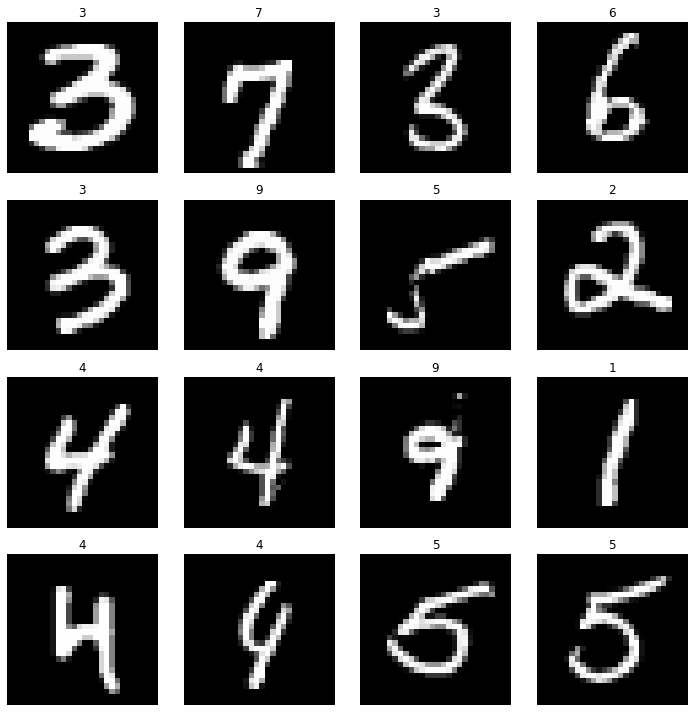

In [5]:
data.show_batch(rows=4, figsize=(10,10))

## Create and train a CNN model
 Uses the resnet18 architecture ( 18 hidden layers ) 
 and the cross_entropy loss function

In [ ]:
learn = cnn_learner(data, models.resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(5, 6e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.181339,0.132510,0.958800,00:35
1,0.076947,0.053781,0.984200,00:34
2,0.062722,0.037723,0.989600,00:33
3,0.027139,0.019510,0.993900,00:33
4,0.018677,0.015884,0.995900,00:33


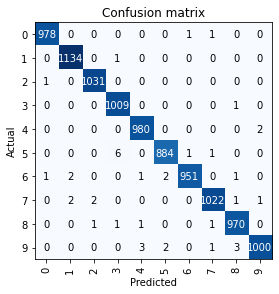

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()